Análise 1 - Professores por etapa da educação básica
- Porcentagem de professores por Etapa do Ensino Básico
- Porcentagem de professores por Etapa do Ensino Básico quebrado por estado

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

file_inep_teachers = r'C:\Users\Usuario\Documents\IAPP\scripts\iapp_pesquisa_eduacao_br\Repo\Dados_INEP_docente.xlsx'
df_inep_teachers = pd.read_excel(file_inep_teachers, sheet_name='Nr_Docentes')
df_inep_teachers.drop(columns=['Município', 'Código Município', 'Total'], inplace=True)

In [29]:
#agrupando por estados
df_inep_teachers_group = df_inep_teachers.groupby(by='Estado').sum()
df_inep_teachers_group

#normalização
df_percent = df_inep_teachers_group.div(df_inep_teachers_group.sum(axis=1), axis=0)

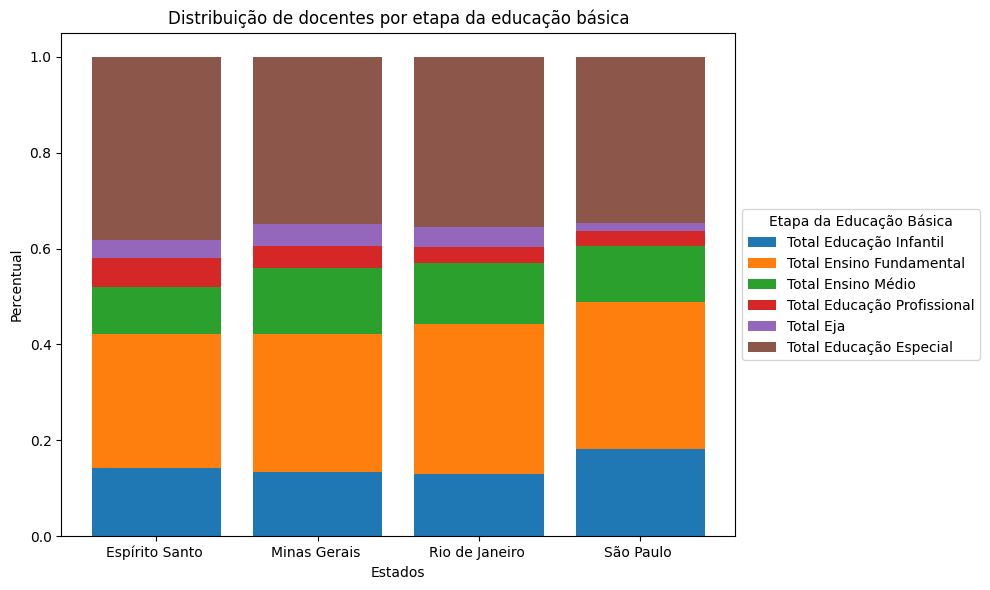

In [30]:

fig, ax = plt.subplots(figsize=(10, 6))

# Acumulador para base da barra empilhada
bottom = pd.Series([0]*df_inep_teachers_group.shape[0], index=df_inep_teachers_group.index)

for col in df_percent.columns:
    ax.bar(df_percent.index, df_percent[col], bottom=bottom, label=col)
    bottom += df_percent[col]

# Estilização
ax.set_ylabel('Percentual')
ax.set_xlabel('Estados')
ax.set_title('Distribuição de docentes por etapa da educação básica')
ax.legend(
    title='Etapa da Educação Básica',
    loc='center left',
    bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [31]:
df_inep_teachers_group_ri = df_inep_teachers_group.reset_index()
df_inep_teachers_group_ri

,Estado,Total Educação Infantil,Total Ensino Fundamental,Total Ensino Médio,Total Educação Profissional,Total Eja,Total Educação Especial
0,Espírito Santo,30520,60053,21159,12647,8193,82012
1,Minas Gerais,68567,147600,70334,23257,23792,178433
2,Rio de Janeiro,90870,218046,88823,22861,28619,248372
3,São Paulo,350853,584976,226821,60374,31544,664988
